#import the important library

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')


#lets see the data set 

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df               

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
df.shape

(30, 17)

In [7]:
df.size

510

In [9]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000



all other seems to ok
#no null values seen

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None


In [ ]:
#seen to be ok


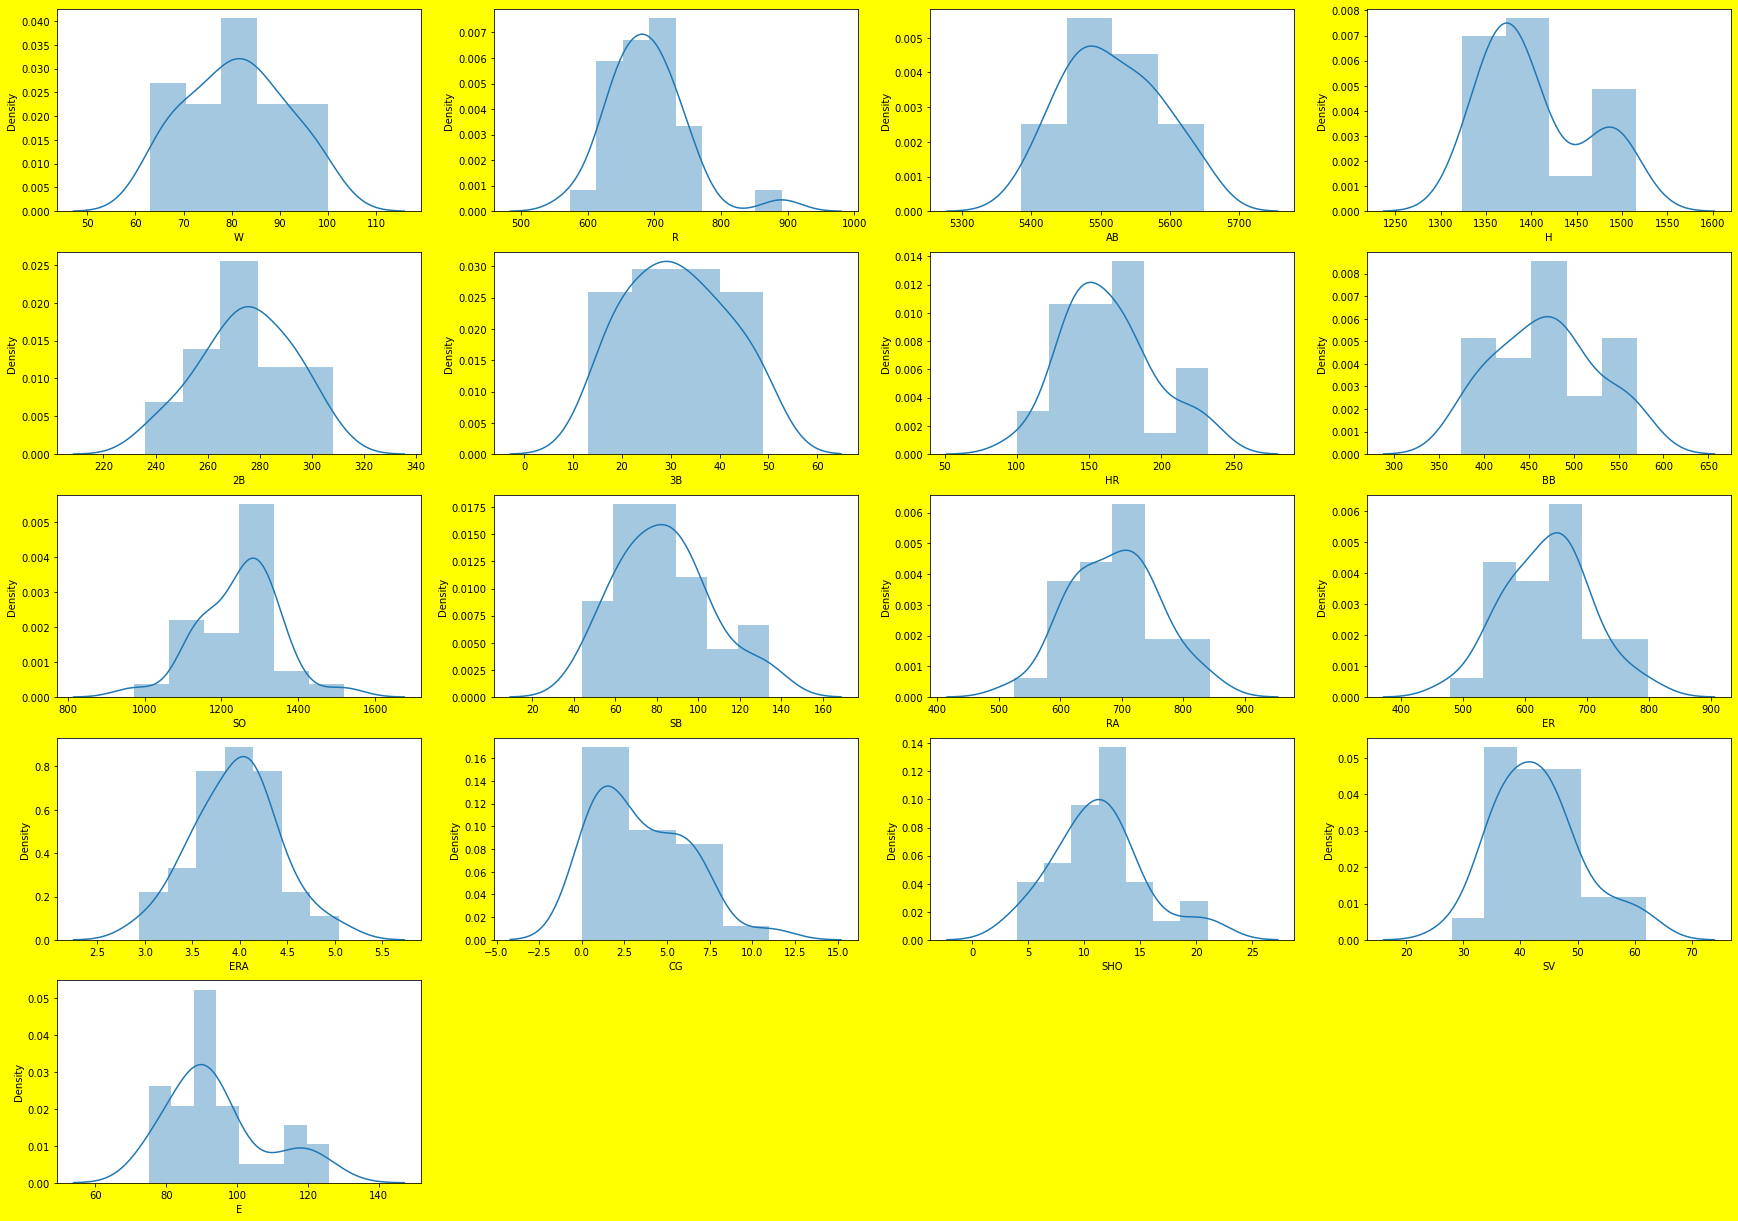

In [13]:
plt.figure(figsize=(30,35),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()        

In [ ]:
#lets see for outlier

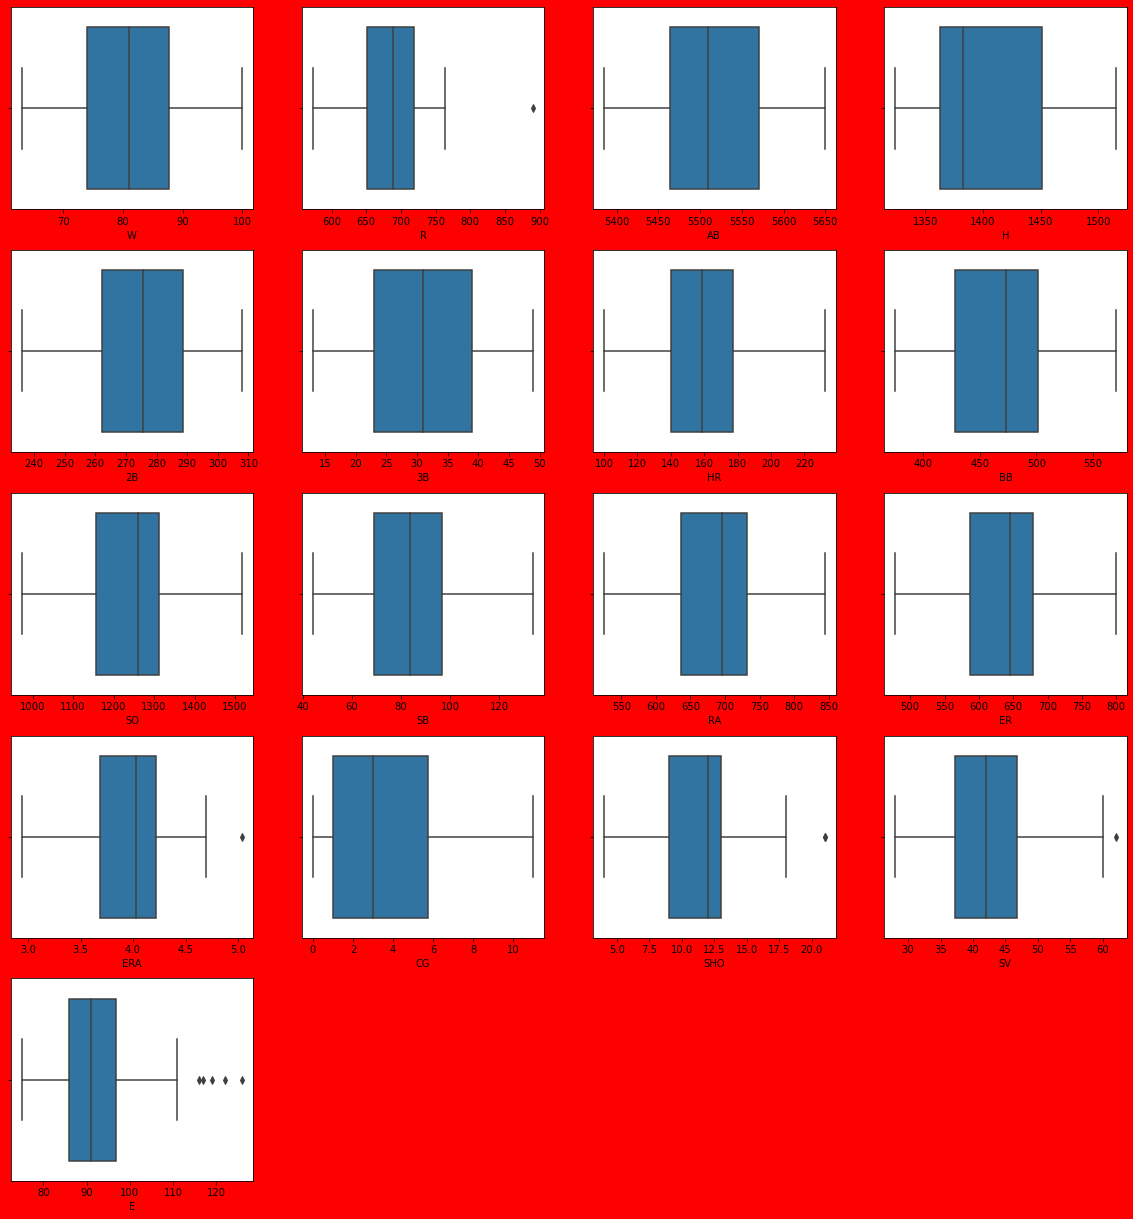

In [12]:
plt.figure(figsize=(20,35),facecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()  

In [ ]:
#managing outlier

In [14]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)

In [15]:
iqr=q3-q1

In [19]:
print(q1)
print(q3)
print(iqr)

W        74.0000
R       651.2500
AB     5464.0000
H      1363.0000
2B      262.2500
3B       23.0000
HR      140.2500
BB      428.2500
SO     1157.5000
SB       69.0000
RA      636.2500
ER      587.2500
ERA       3.6825
CG        1.0000
SHO       9.0000
SV       37.2500
E        86.0000
Name: 0.25, dtype: float64
W        87.75
R       718.25
AB     5570.00
H      1451.50
2B      288.75
3B       39.00
HR      177.00
BB      501.25
SO     1311.50
SB       96.50
RA      732.50
ER      679.25
ERA       4.22
CG        5.75
SHO      13.00
SV       46.75
E        96.75
Name: 0.75, dtype: float64
W       13.7500
R       67.0000
AB     106.0000
H       88.5000
2B      26.5000
3B      16.0000
HR      36.7500
BB      73.0000
SO     154.0000
SB      27.5000
RA      96.2500
ER      92.0000
ERA      0.5375
CG       4.7500
SHO      4.0000
SV       9.5000
E       10.7500
dtype: float64


In [21]:
r=(q3.R+(1.5*iqr.R))
r

818.75

In [23]:
index=np.where(df['R']>r)
index

(array([5], dtype=int64),)

In [24]:
df=df.drop(df.index[index])
df.shape


(29, 17)

In [25]:
df.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [27]:
era=(q3.ERA+(1.5*iqr.ERA))
era

5.026250000000001

In [28]:
index=np.where(df['ERA']>era)
index

(array([28], dtype=int64),)

In [31]:
df=df.drop(df.index[index])
df.shape

(28, 17)

In [32]:
df.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [36]:
sho=(q3.SHO+(1.5*iqr.SHO))

     

In [37]:
index=np.where(df['SHO']>sho)
index

(array([16, 24], dtype=int64),)

In [38]:
df=df.drop(df.index[index])
df.shape

(26, 17)

In [39]:
df.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [40]:
sv=(q3.SV+(1.5*iqr.SV))
index=np.where(df['SV']>sv)
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [41]:
e=(q3.E+(1.5*iqr.E))
index=np.where(df['E']>e)
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


In [42]:
df.shape

(20, 17)

In [43]:
df.size

340

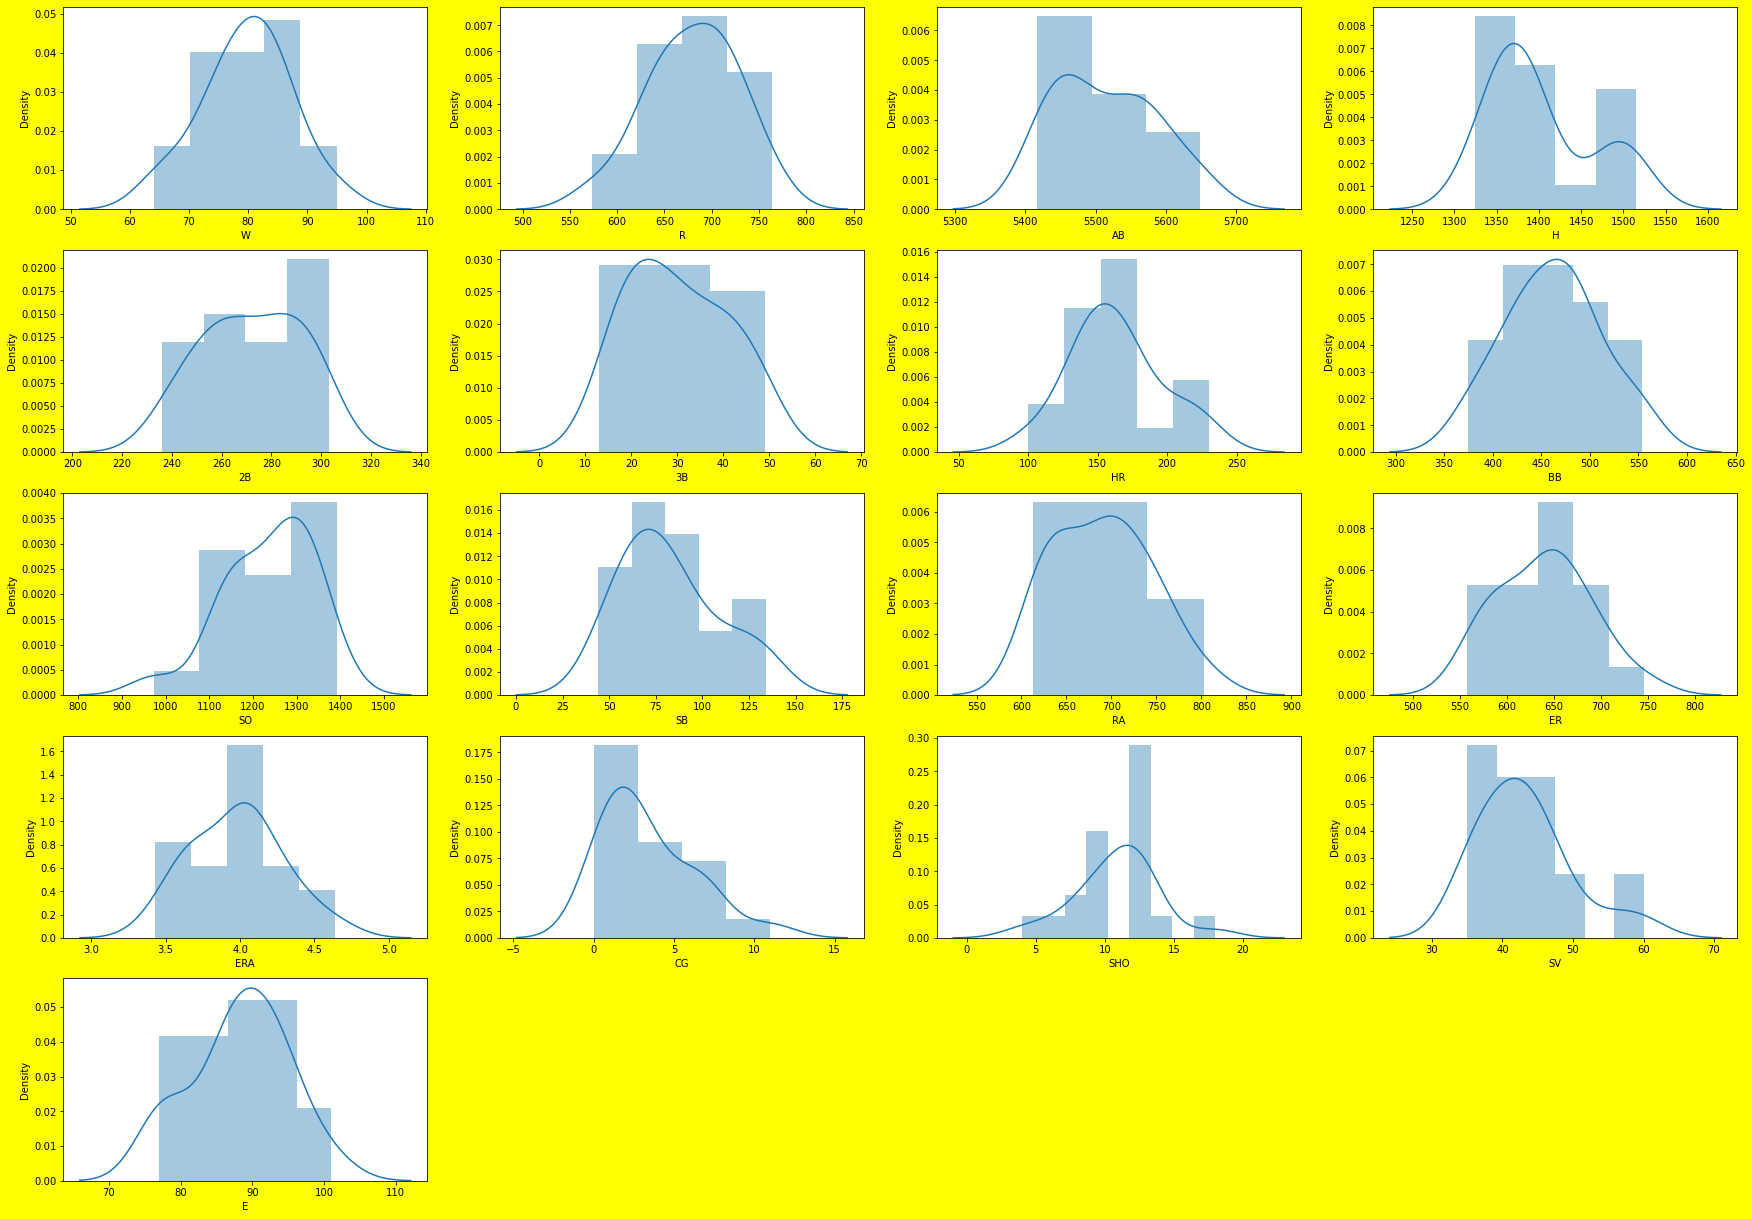

In [44]:
plt.figure(figsize=(30,35),facecolor='yellow')
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show() 

In [ ]:
# data seen to be good

In [ ]:
# separate labels and features

In [66]:
X=df.drop(columns=['W'])
y=df['W']

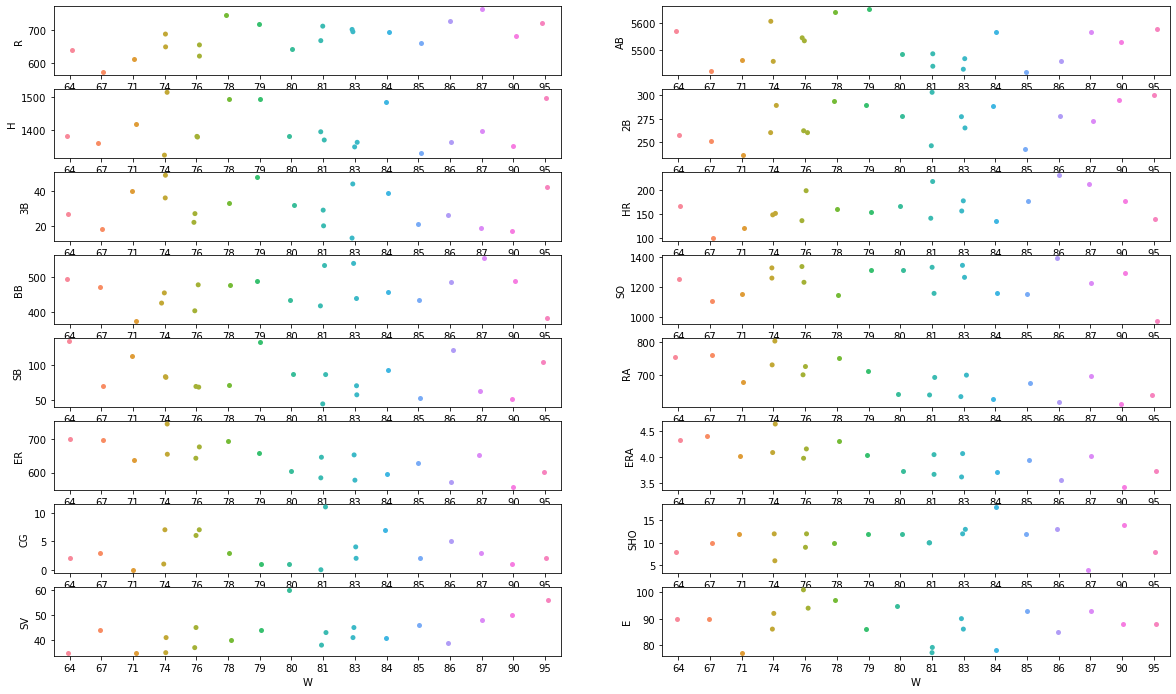

In [67]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in X:
    if plotnumber<=30:
        ax=plt.subplot(10,2,plotnumber)
        sns.stripplot(y,X[column])
        plotnumber+=1
plt.show() 

In [ ]:
#using stripplot seen to be good

In [ ]:
#standardised the data

In [82]:
scalar=StandardScaler()

In [83]:
x_scaled=scalar.fit_transform(X)

In [84]:
x_scaled

array([[ 0.94564673,  0.85045895,  1.60490118,  1.42824738,  1.1200031 ,
        -0.75500922, -1.65492227, -2.63251545,  0.83576663, -0.93352439,
        -0.7886327 , -0.82441053, -0.49374193, -0.97029183,  1.98214924,
        -0.0382192 ],
       [ 0.34862061, -0.67528136, -0.89011326,  0.24872531,  1.30823892,
        -0.22353275, -0.48255482,  0.2791607 , -0.47979195,  0.18936937,
         0.28630571,  0.30811303, -0.49374193,  0.39152127,  0.28536779,
        -0.34397277],
       [-0.22708315, -1.07084367, -0.1146358 ,  1.58209809, -0.1035297 ,
        -0.69248258,  1.48534769, -0.79145561,  0.13929444, -0.95255648,
        -1.14005488, -1.02426763,  2.68031334, -0.28938528, -0.79440222,
        -1.41411027],
       [-1.22923414,  0.2571155 , -0.35065068, -0.62309536, -0.29176551,
        -0.84879919, -1.21528447, -0.05102938, -0.55717775,  0.20840147,
         0.07958679,  0.00832738,  1.26962211, -0.62983856, -0.94865508,
         1.94917902],
       [ 0.19936408,  1.27427571,  1

In [87]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=348)
y_train.head()

27    79
23    67
12    85
1     83
19    64
Name: W, dtype: int64

In [88]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()